In [1]:
#This library is used for numerical operations on large, multi-dimensional arrays and matrices. It also provides a large collection of mathematical functions to operate on these arrays.
import numpy as np
#This is a plotting library used for creating static, animated, and interactive visualizations in Python. The pyplot module provides a MATLAB-like interface for creating plots and chart
import matplotlib.pyplot as plt
#This library is used for data manipulation and analysis. It provides data structures like DataFrames, which are very useful for handling and analyzing structured data.
import pandas as pd


In [2]:
#function from the pandas library to read data from a CSV file named 'Salary_Data.csv'he resulting DataFrame is then assigned to the variable data
data = pd.read_csv('Salary_Data.csv')

In [3]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
independant = data[['YearsExperience']]

In [5]:
dependant = data[['Salary']]

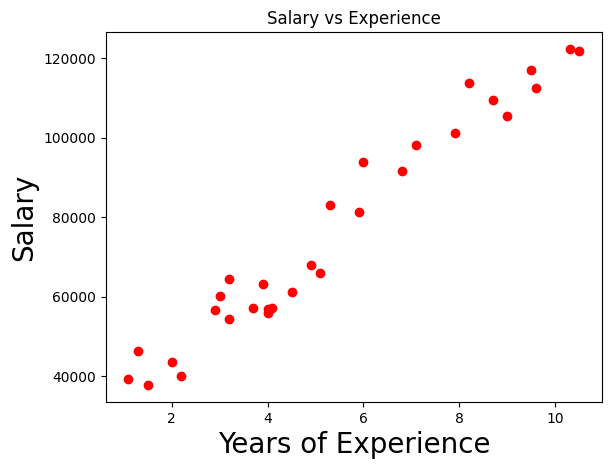

In [6]:
plt.scatter(independant, dependant, color = 'red')
"""
This code snippet creates a scatter plot to visualize the relationship between years of experience and salary.

Parameters:
- independant: array-like, the independent variable (Years of Experience).
- dependant: array-like, the dependent variable (Salary).

The plot includes:
- Red scatter points representing the data.
- Title: 'Salary vs Experience'.
- X-axis label: 'Years of Experience' with a font size of 20.
- Y-axis label: 'Salary' with a font size of 20.

The plot is displayed using plt.show().
"""
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience', fontsize=20)
plt.ylabel('Salary', fontsize=20)
plt.show()

In [7]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(independant, dependant, test_size = 1/3, random_state = 0)

In [8]:
y_test

,Salary
2,37731.0
28,122391.0
13,57081.0
10,63218.0
26,116969.0
24,109431.0
27,112635.0
11,55794.0
17,83088.0
22,101302.0


In [9]:
#Model Creation 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train) # Model creation happens here

LinearRegression()

In [10]:
#This script prints the weight (coefficient) and intercept (bias) of a trained linear regression model.
weight = regressor.coef_
print("weight of the model is ={}".format(weight))
bias = regressor.intercept_
print("Intercept of the model is ={}".format(bias))

weight of the model is =[[9345.94244312]]
Intercept of the model is =[26816.19224403]


In [11]:
#Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([[ 40835.10590871],
       [123079.39940819],
       [ 65134.55626083],
       [ 63265.36777221],
       [115602.64545369],
       [108125.8914992 ],
       [116537.23969801],
       [ 64199.96201652],
       [ 76349.68719258],
       [100649.1375447 ]])

In [12]:
#Evaluating the performance of the regression model
from sklearn.metrics import r2_score
r_score=r2_score(y_test, y_pred)
r_score

0.9749154407708353

In [13]:
#Deploying the model
import pickle
filename = 'finalized_model.sav'
pickle.dump(regressor, open(filename, 'wb'))

In [14]:
import pickle
loaded_model = pickle.load(open('finalized_model.sav', 'rb'))
result = loaded_model.predict([[11]])    
print(result)

[[129621.55911838]]


C:\Users\gopinath.palanisamy\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [15]:
prediction_input = int(input("Enter the years of experience: "))

Enter the years of experience:  15


In [16]:
Future_Prediction=loaded_model.predict([[prediction_input]])
print("The predicted salary for {} years of experience is {}".format(prediction_input,Future_Prediction))

The predicted salary for 15 years of experience is [[167005.32889087]]


C:\Users\gopinath.palanisamy\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
